## Selma Attié - DMDA4

# Dataset Titanic - Regression Logistique - Will the passenger survive ?

In [1]:
# On importe les librairies nécessaires

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from statsmodels.api import Logit
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant
from sklearn.metrics import roc_auc_score , roc_curve, accuracy_score , precision_score, recall_score
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
import scipy.stats as ss
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

sn.set_style("ticks")

In [2]:
# On charge le Dataset

df=pd.read_csv('Titanic-Dataset.csv')

In [3]:
# On visualisie les statistiques du dataset

print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [4]:
# On visualise les 10 premières lignes du dataset

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Je verifie l'existence de valeurs manquantes 

missing = df.isna().sum()
print(missing)
print(f"Total rows: {len(df)}")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Total rows: 891


In [6]:
# Je regarde les colonnes du dataset

df.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [7]:
# Je cherche le nombre de doublons

duplicates = df.duplicated().sum()
duplicates

0

In [8]:
# Nous cherchons à afficher les doublons si il y en a

lines_duplicated= df.duplicated()

lines = df[lines_duplicated]
lines

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [9]:
# On compte le nombre de femmes et d'hommes

sex=df['Sex'].value_counts()
sex

Sex
male      577
female    314
Name: count, dtype: int64

In [10]:
# On compte le nombre de personnes qui ont survécu ou non

survived=df['Survived'].value_counts()
survived

Survived
0    549
1    342
Name: count, dtype: int64

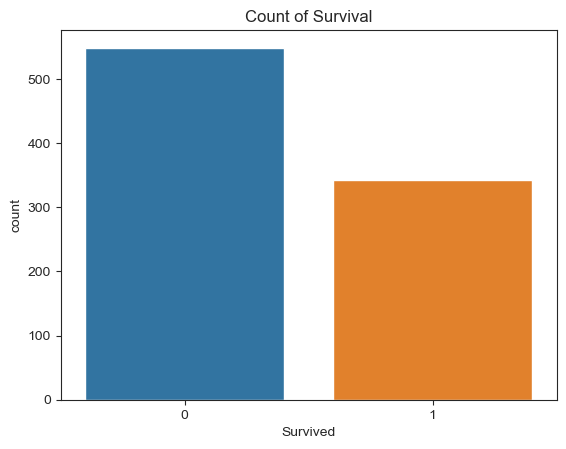

In [11]:
# On visualise le nombre de personnes qui ont survécu ou non

sn.countplot(x='Survived', data=df)
plt.title('Count of Survival')
plt.show()

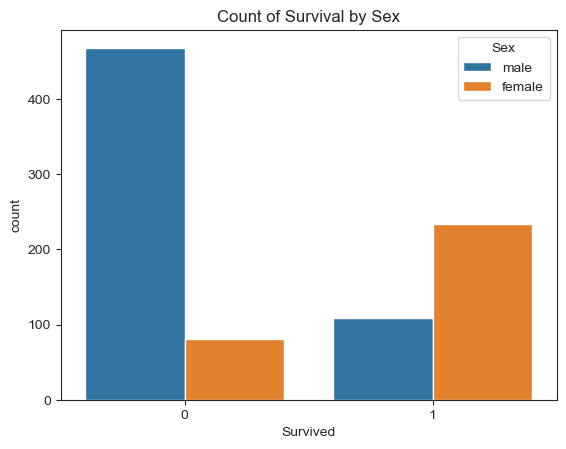

In [12]:
# On visualise le nombre de personnes qui ont survécu ou non en affectant le genre

sn.countplot(x='Survived', hue='Sex', data=df)
plt.title('Count of Survival by Sex')
plt.show()

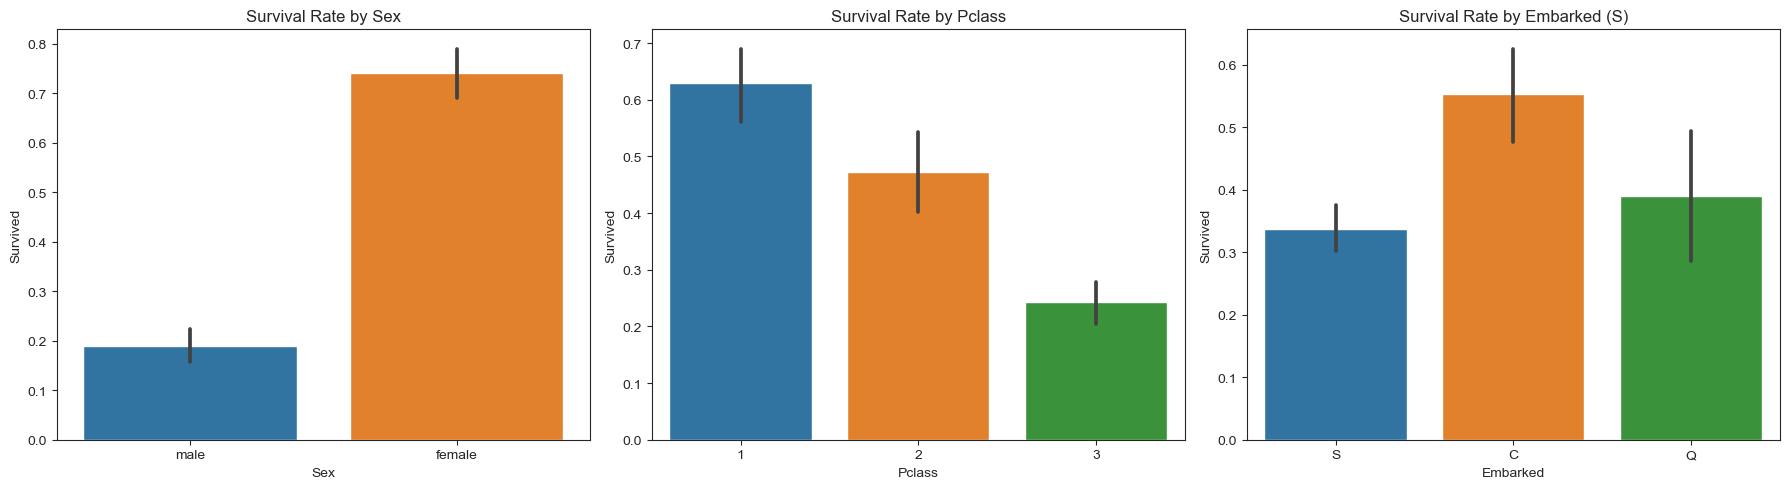

In [13]:
# Génération de Bar Plots pour les variables catégorielles

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sn.barplot(ax=axes[0], x='Sex', y='Survived', data=df)
axes[0].set_title('Survival Rate by Sex')

sn.barplot(ax=axes[1], x='Pclass', y='Survived', data=df)
axes[1].set_title('Survival Rate by Pclass')

sn.barplot(ax=axes[2], x='Embarked', y='Survived', data=df)
axes[2].set_title('Survival Rate by Embarked (S)')

plt.tight_layout()
plt.show()

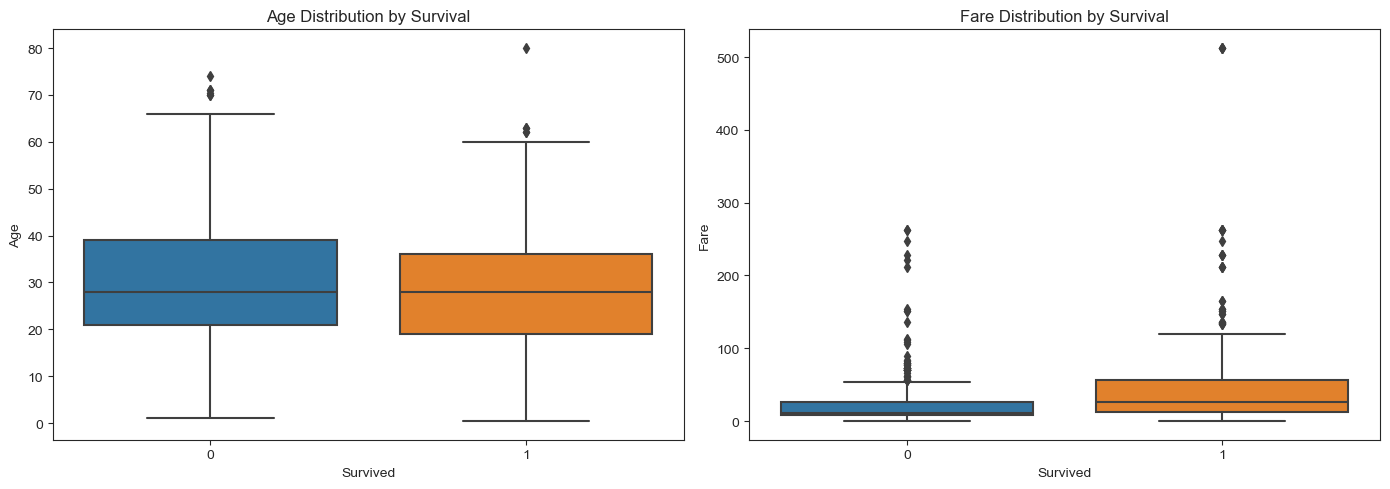

In [14]:
# Génération des box plots pour les variables continues

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sn.boxplot(ax=axes[0], x='Survived', y='Age', data=df)
axes[0].set_title('Age Distribution by Survival')

sn.boxplot(ax=axes[1], x='Survived', y='Fare', data=df)
axes[1].set_title('Fare Distribution by Survival')

plt.tight_layout()
plt.show()

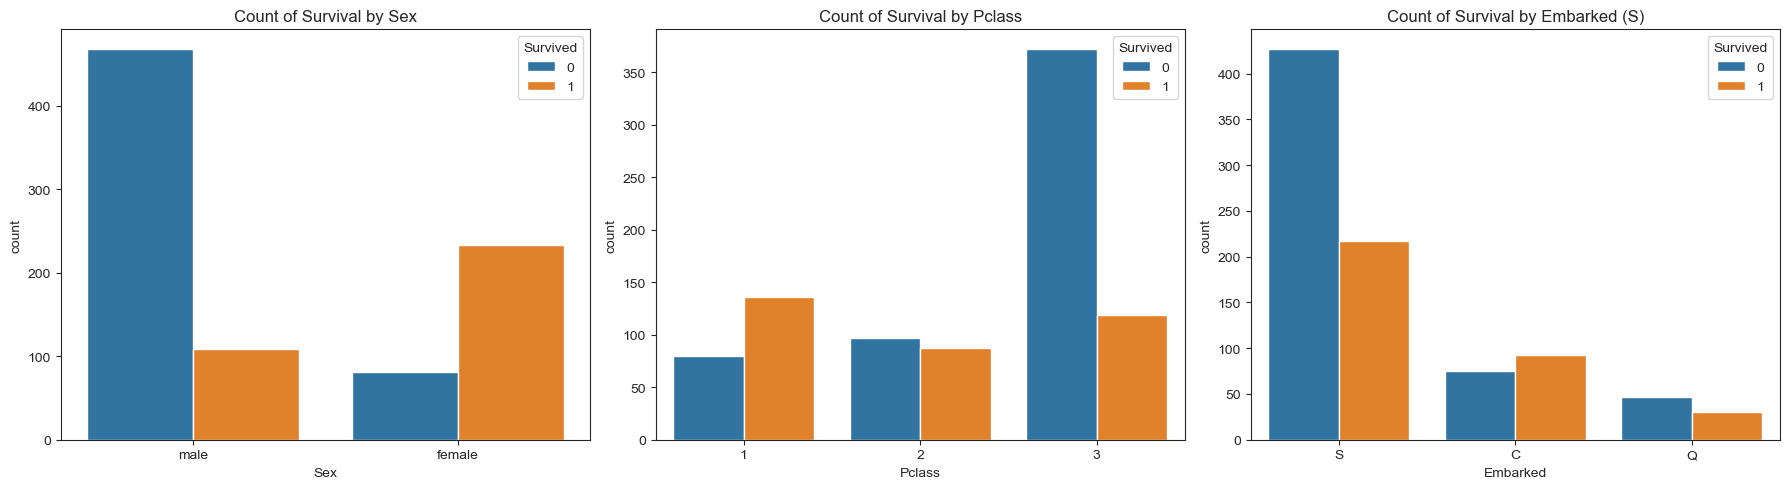

In [15]:
# Génération des count plots pour les variables catégorielles

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sn.countplot(ax=axes[0], x='Sex', hue='Survived', data=df)
axes[0].set_title('Count of Survival by Sex')

sn.countplot(ax=axes[1], x='Pclass', hue='Survived', data=df)
axes[1].set_title('Count of Survival by Pclass')

sn.countplot(ax=axes[2], x='Embarked', hue='Survived', data=df)
axes[2].set_title('Count of Survival by Embarked (S)')

plt.tight_layout()
plt.show()

### Interprétations des graphiques



#### 1. Count of Survival

  - Il y a plus de passagers qui n'ont pas survécu que ceux qui ont survécu. Le nombre de non-survivants est supérieur au nombre de survivants.


#### 2. Count of Survival by Sex

  - Les femmes ont un taux de survie plus élevé que les hommes. La majorité des non-survivants sont des hommes.

#### 3. Bar Plots 

- **Survival rate by Sex :**
  - Les femmes ont un taux de survie significativement plus élevé que les hommes.

- **Survival rate by Pclass :**
  - Les passagers de première classe ont le taux de survie le plus élevé, suivi de ceux de deuxième classe, avec les passagers de troisième classe ayant le taux de survie le plus bas.

- **Survival rate by Embarked :**
  - Les passagers qui embarquent à Cherbourg (C) ont les taux de survie les plus élevés, suivis par ceux de Queenstown (Q) et Southampton (S).

#### 4. Box plots 

- **Age distribution by Survival :**
  - Les survivants tendent à être légèrement plus jeunes que les non-survivants, mais la différence n'est pas très marquée.

- **Fare distribution by Survival :**
  - Les survivants ont payé des tarifs nettement plus élevés que les non-survivants. Les tarifs plus élevés sont associés à une meilleure chance de survie.

#### 5. Count plots 

- **Count of Survival by Sex :**
  - Il y a une plus grande proportion de femmes parmi les survivants et une majorité d'hommes parmi les non-survivants.

- **Count of Survival by Pclass :**
  - Une grande proportion de passagers de troisième classe n'a pas survécu, alors que les passagers de première classe ont une meilleure chance de survie.

- **Count of Survival by Embarked :**
  - Les passagers embarquant à Southampton (S) ont un taux de survie plus faible par rapport à ceux embarquant à Cherbourg (C) et Queenstown (Q).

/Users/selmaattie/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.4980392156862745, 0.054901960784313725)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


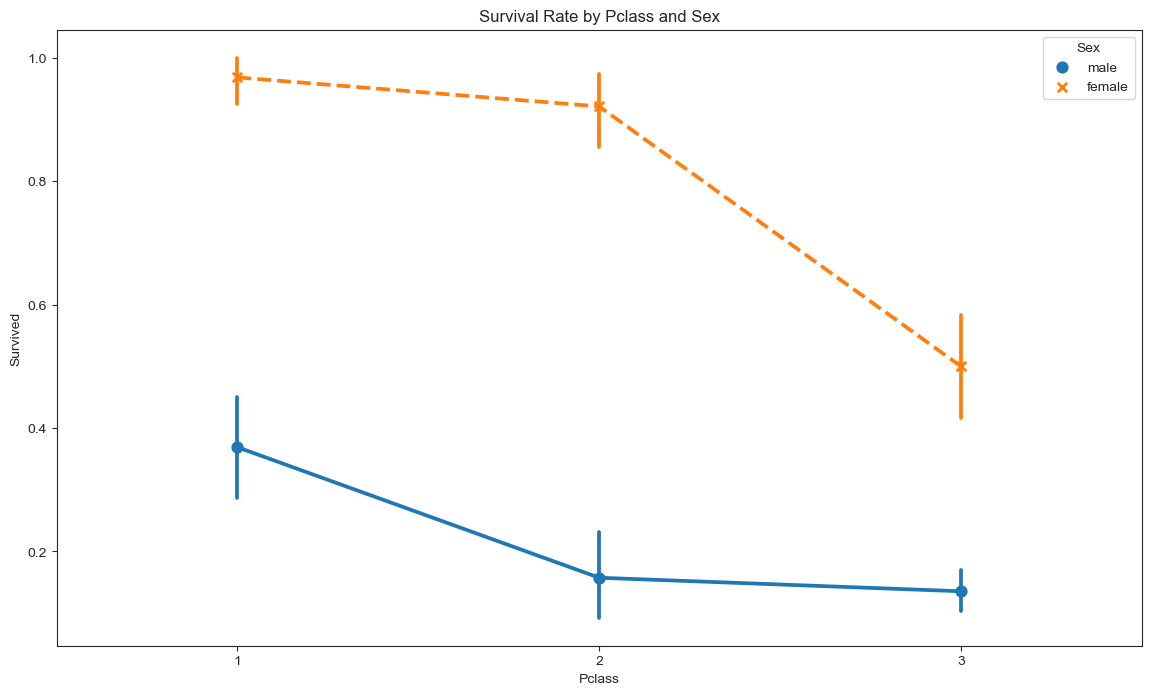

In [16]:
# Point Plot du taux de survie par Pclass and Sex

plt.figure(figsize=(14, 8))
sn.pointplot(x='Pclass', y='Survived', hue='Sex', data=df, markers=["o", "x"], linestyles=["-", "--"])
plt.title('Survival Rate by Pclass and Sex')
plt.show()

### Taux de survie par Pclass and Sex

1. **Femmes (ligne bleue) :**
   - **Première classe (Pclass 1) :**
     - Les femmes de première classe ont presque toutes survécu, avec un taux de survie proche de 100%.
   - **Deuxième classe (Pclass 2) :**
     - Le taux de survie des femmes en deuxième classe est également très élevé, bien que légèrement inférieur à celui des femmes en première classe.
   - **Troisième classe (Pclass 3) :**
     - Les femmes en troisième classe ont un taux de survie plus bas que celles des première et deuxième classes, mais leur taux de survie reste supérieur à celui des hommes dans toutes les classes.

2. **Hommes (ligne orange pointillée) :**
   - **Première classe (Pclass 1) :**
     - Les hommes de première classe ont un taux de survie d'environ 40%, ce qui est beaucoup plus bas que celui des femmes de première classe.
   - **Deuxième classe (Pclass 2) :**
     - Le taux de survie des hommes en deuxième classe diminue encore plus, autour de 15%.
   - **Troisième classe (Pclass 3) :**
     - Les hommes en troisième classe ont le taux de survie le plus bas, autour de 10%.

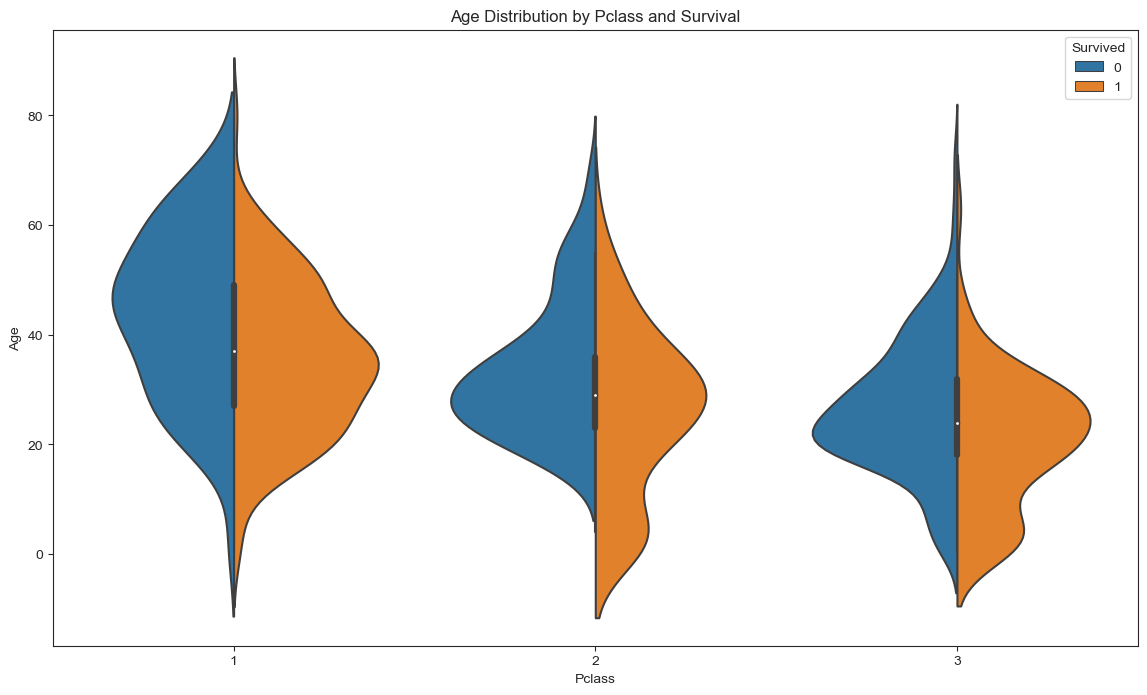

In [17]:
# Violin Plot pour la distribution des âges par Pclass and Survived

plt.figure(figsize=(14, 8))
sn.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
plt.title('Age Distribution by Pclass and Survival')
plt.show()

Ce graphique montre la distribution des âges par classe (Pclass) et survie (Survived) :
1. **Première classe (Pclass 1) :**
   - Les passagers de première classe qui ont survécu (orange) sont répartis sur une large gamme d'âges, avec une concentration notable de survivants jeunes et d'âge moyen.
   - Les non-survivants (bleu) sont également présents dans toutes les tranches d'âge, mais il y a une légère concentration dans les âges moyens et plus âgés.
   - La distribution montre que les jeunes passagers de première classe avaient de meilleures chances de survie.

2. **Deuxième classe (Pclass 2) :**
   - La distribution des survivants (orange) et des non-survivants (bleu) est plus équilibrée en termes d'âge.
   - Les passagers jeunes ont une meilleure chance de survie par rapport aux passagers plus âgés.
   - Les tranches d'âge des survivants et non-survivants sont similaires, mais les survivants tendent à être légèrement plus jeunes.

3. **Troisième classe (Pclass 3) :**
   - La majorité des passagers de troisième classe sont jeunes, avec une forte concentration de non-survivants (bleu) parmi les jeunes adultes et les enfants.
   - Les survivants (orange) sont également jeunes, mais en moindre proportion par rapport aux non-survivants.
   - La distribution montre une forte mortalité parmi les jeunes passagers de troisième classe.

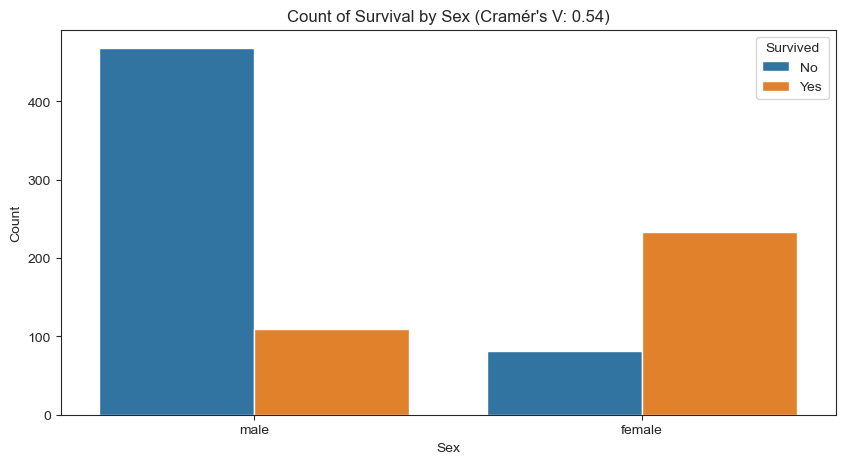

In [18]:
# On réalise un Cramer's V afin de mesurer l'association de valeurs categorielles

def cramers_v(x, y):
    """Calculate Cramér's V statistic for two categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calcul Cramér's V

cramers_v_value = cramers_v(df['Sex'], df['Survived'])

# Analyse de la relation entre le genre et la survie 

plt.figure(figsize=(10, 5))
sn.countplot(x='Sex', hue='Survived', data=df)
plt.title(f'Count of Survival by Sex (Cramér\'s V: {cramers_v_value:.2f})')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [19]:
# On supprime les colonnes avec peu d'importance

df.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)

/Users/selmaattie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


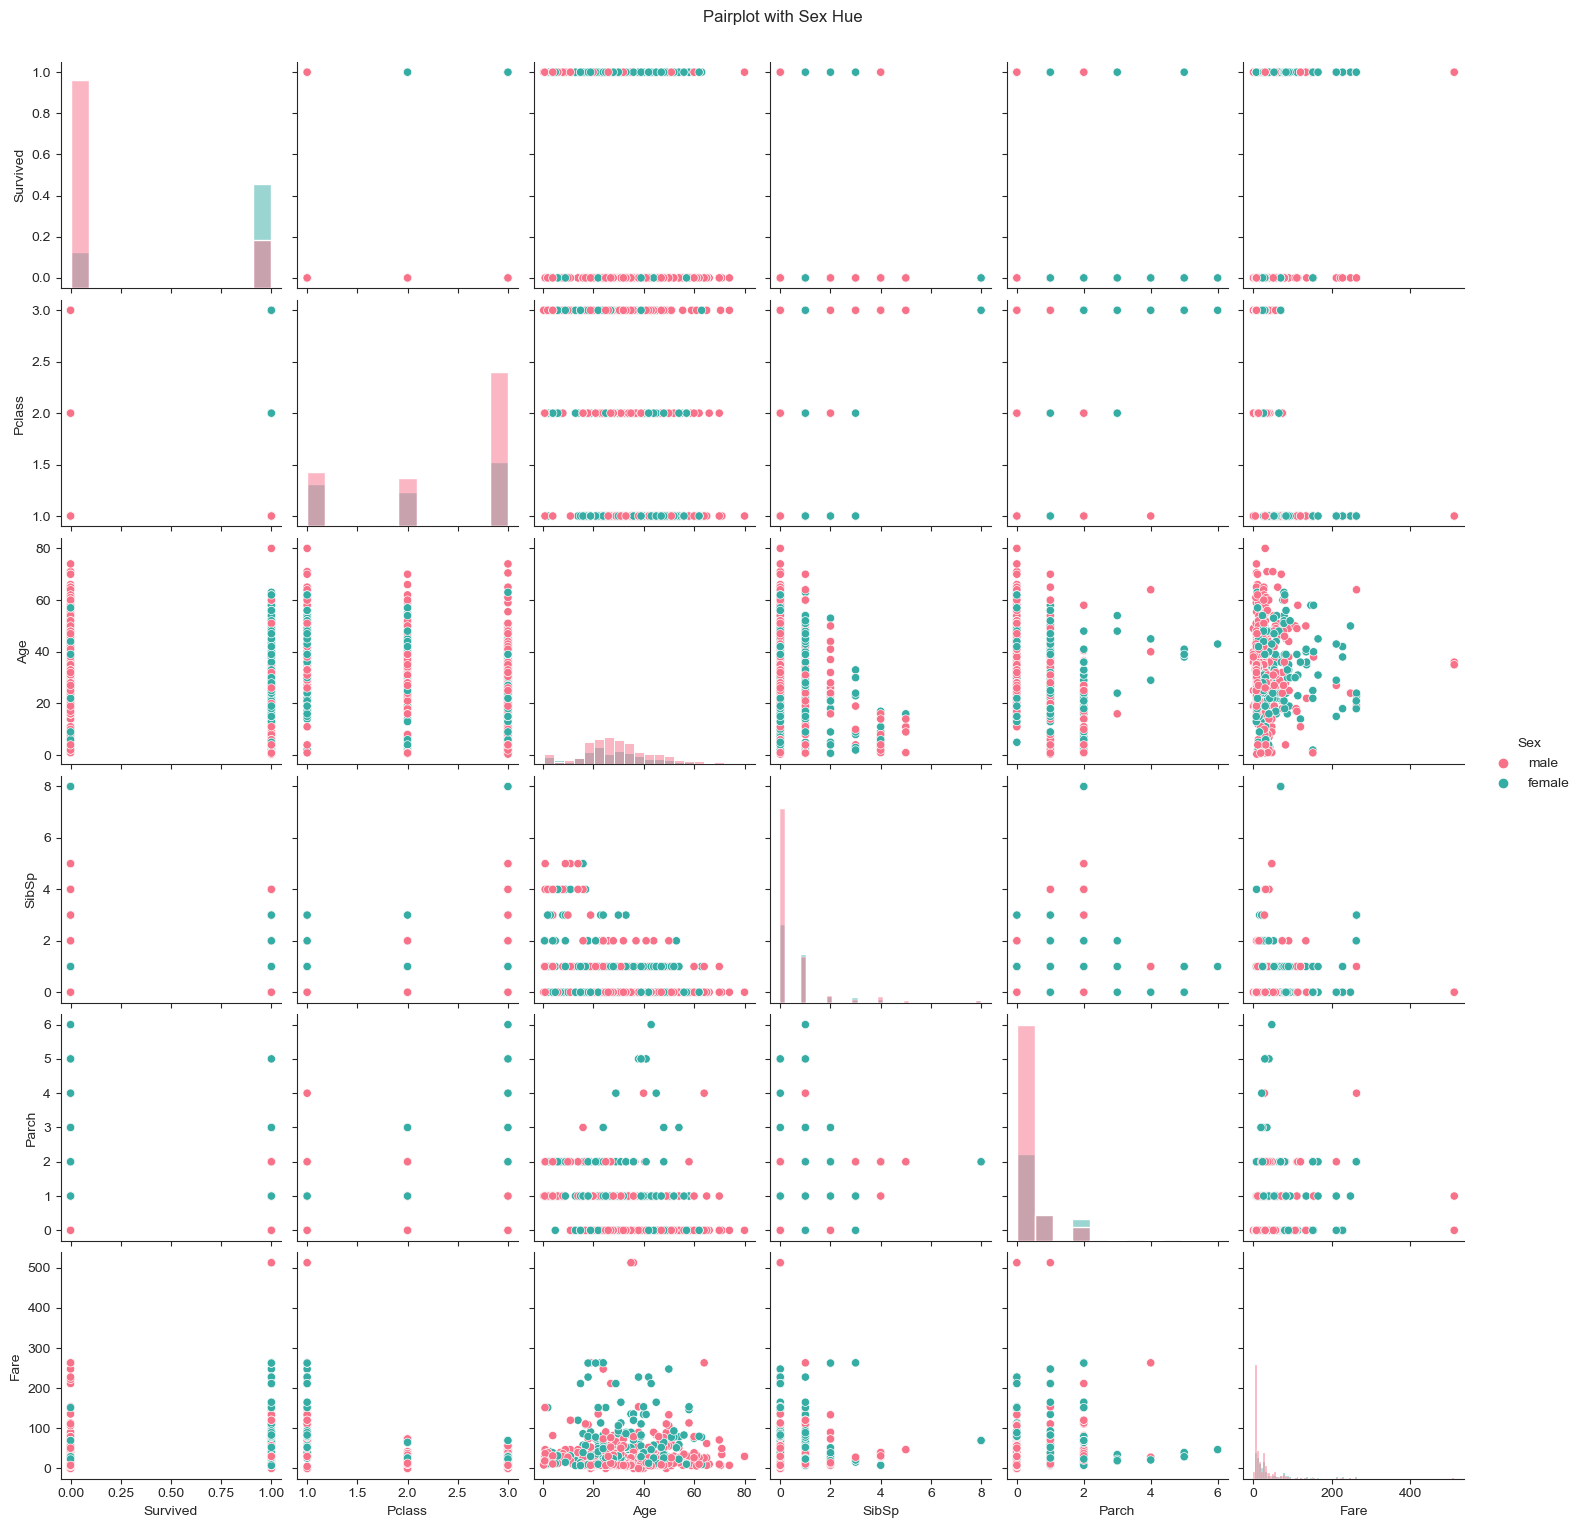

In [20]:
# Création du pairplot avec la variable 'Sex'

pairplot = sn.pairplot(df, hue='Sex', diag_kind="hist", kind="scatter", palette="husl")
pairplot.fig.suptitle("Pairplot with Sex Hue", y=1.02)  
plt.show()

/Users/selmaattie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


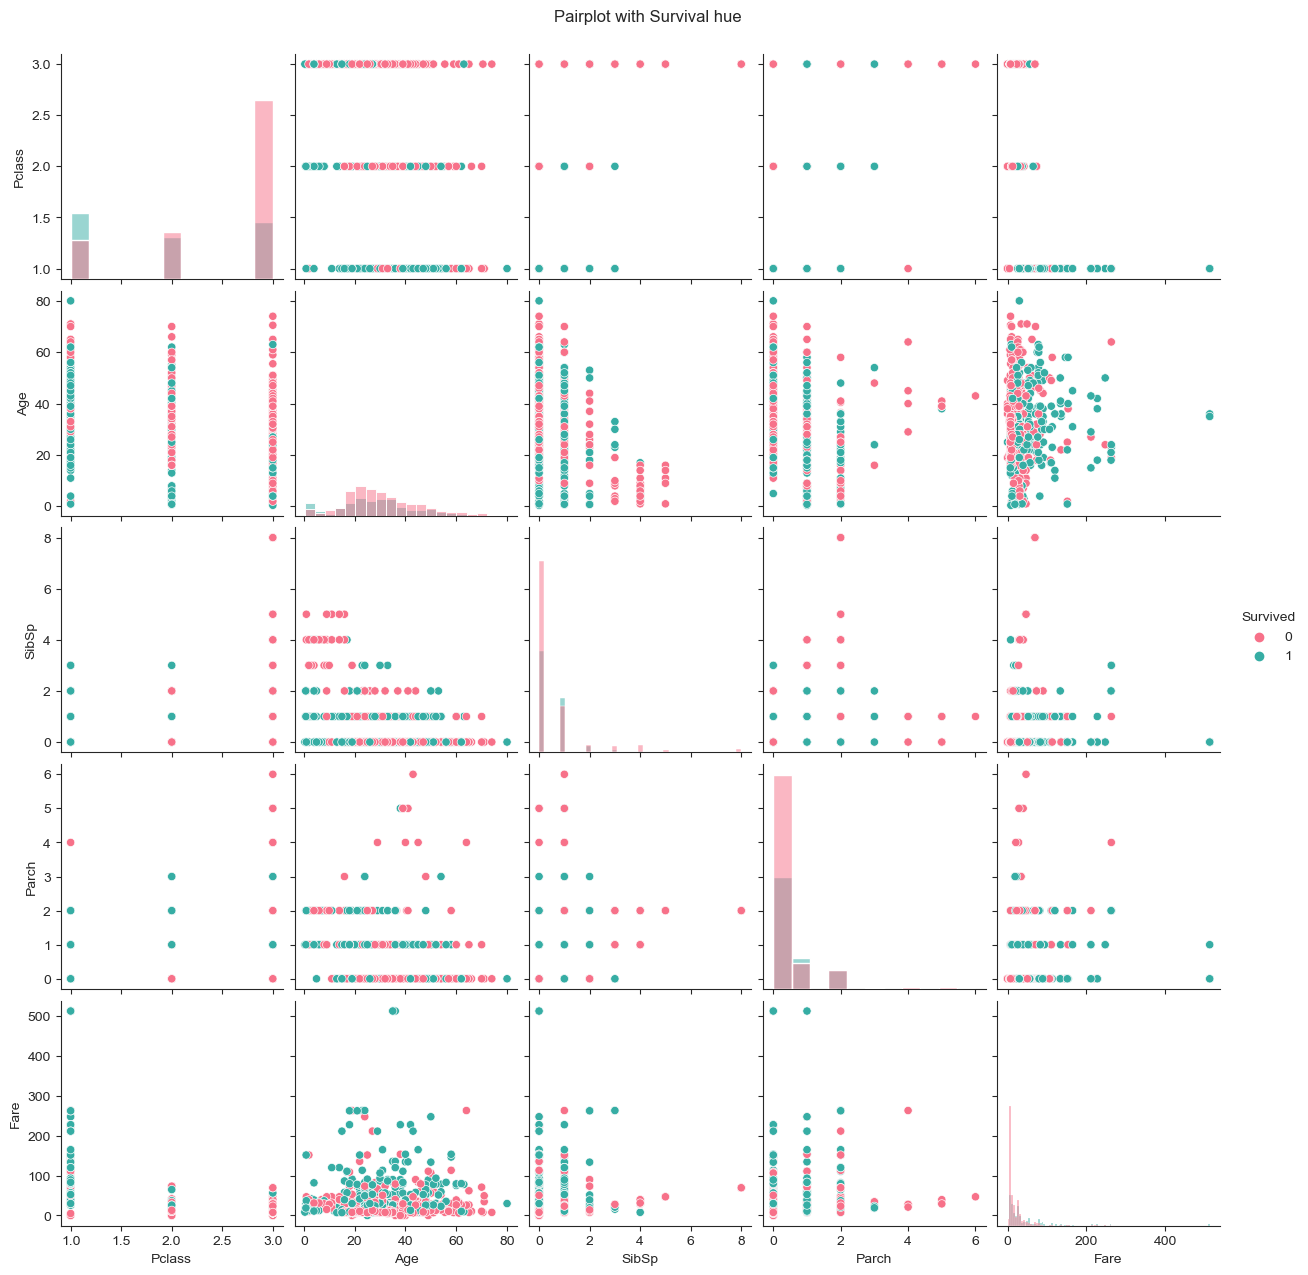

In [21]:
# Création du pairplot avec la variable 'Survived'

pairplot = sn.pairplot(df, hue='Survived', diag_kind="hist", kind="scatter", palette="husl")
pairplot.fig.suptitle("Pairplot with Survival hue", y=1.02)  
plt.show()


### Analyse des pairplots 

#### Âge (Age)
- **Avec `Survived` :**
  - Les passagers qui ont survécu sont globalement plus jeunes, avec une concentration notable de survivants parmi les plus jeunes.
  - Les non-survivants sont répartis de manière plus uniforme sur toutes les tranches d'âge, avec une légère concentration dans les âges moyens.

- **Avec `Sex` :**
  - Les femmes, représentées par des points verts, montrent une distribution d'âge relativement uniforme, mais une concentration légèrement plus élevée de jeunes femmes.
  - Les hommes, représentés par des points roses, ont une distribution d'âge plus étendue et uniforme.

#### Tarif (Fare)
- **Avec `Survived` :**
  - Les passagers ayant payé des tarifs plus élevés, souvent passagers des classes supérieures, avaient un meilleur accès aux canots de sauvetage et donc un taux de survie plus élevé.
  - La majorité des non-survivants ont payé des tarifs plus bas, ce qui indique qu'ils étaient principalement en troisième classe.

- **Avec `Sex` :**
  - Les femmes ont tendance à payer des tarifs plus élevés, ce qui pourrait être dû au fait qu'elles étaient plus nombreuses dans les classes supérieures.
  - Les hommes payaient en moyenne des tarifs plus bas, ce qui pourrait indiquer qu'ils étaient plus nombreux en troisième classe.

#### Classe (Pclass)
- **Avec `Survived` :**
  - Les passagers de première classe (Pclass 1) ont une probabilité de survie beaucoup plus élevée, visible par la concentration de points de survie dans cette classe.
  - Les passagers de troisième classe (Pclass 3) ont un taux de survie beaucoup plus faible, avec une forte concentration de non-survivants dans cette classe.

- **Avec `Sex` :**
  - Il y a une concentration de femmes en première classe, visible par la distribution des points verts dans cette classe.
  - Les hommes sont majoritairement en troisième classe, comme le montrent les points roses.

#### Nombre de frères/sœurs/conjoints à bord (SibSp)
- **Avec `Survived` :**
  - Les passagers avec peu ou pas de frères/sœurs/conjoints à bord avaient une légère tendance à une survie accrue.
  - Ceux ayant trois ou plus compagnons avaient des taux de survie plus faibles.

- **Avec `Sex` :**
  - La majorité des passagers, tant hommes que femmes, voyagent seuls ou avec un seul compagnon.
  - Il y a peu de passagers avec plus de deux frères/sœurs/conjoints à bord.

#### Nombre de parents/enfants à bord (Parch)
- **Avec `Survived` :**
  - Les passagers voyageant seuls ou avec un seul parent/enfant avaient une meilleure chance de survie.
  - Ceux voyageant avec plusieurs parents/enfants avaient une probabilité de survie plus faible.

- **Avec `Sex` :**
  - Les passagers voyageant avec un parent/enfant sont majoritaires.
  - Il y a très peu de passagers voyageant avec plus de deux parents/enfants.

In [22]:
# On convertit la colonne 'Sex' au numerique

df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [23]:
# On convertit 'Embarked' a une variable dummy

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

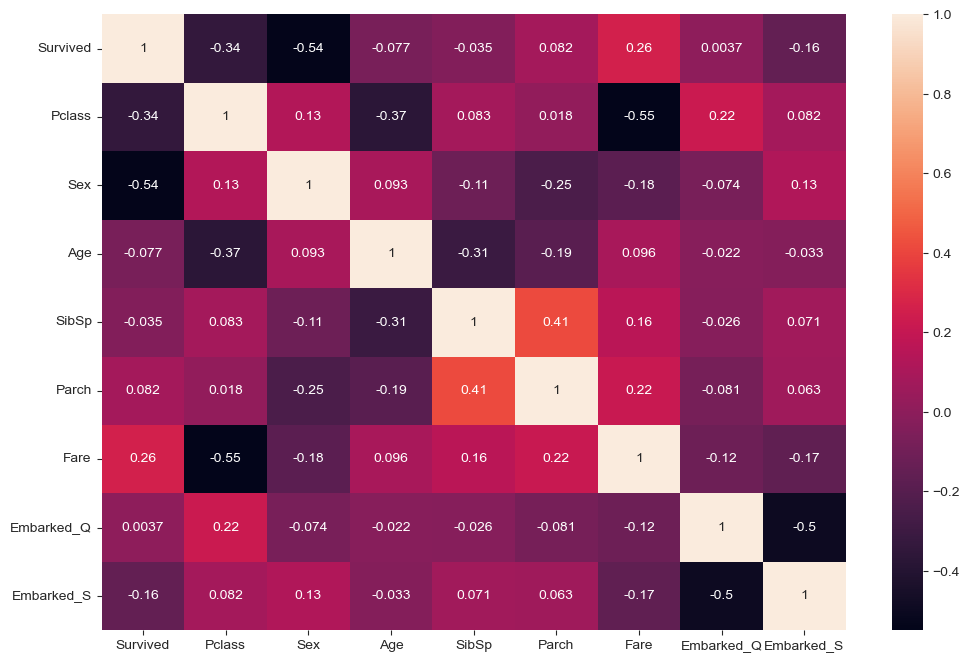

In [24]:
# Matrice de corrélation

plt.figure(figsize=(12, 8))
sn.heatmap(df.corr(), annot=True)
plt.show()

In [25]:
# On s'occupe des valeurs manquantes avec imputer

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [26]:
# On vérifie bien que toutes les colonnes sont numériques

df_imputed['Age'] = pd.to_numeric(df_imputed['Age'])
df_imputed['Fare'] = pd.to_numeric(df_imputed['Fare'])

In [27]:
# On definit notre cible et on divise le jeu de données en 2 : split train test method

X = df_imputed.drop('Survived', axis=1)
y = df_imputed['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Modèle de regression logistique

model = LogisticRegression(max_iter=200)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(y_pred)

[0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.]


In [29]:
# On évalue le modèle

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Calcul des métriques de classification binaire
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy sur les données de test :", accuracy)
print("Precision sur les données de test :", precision)
print("Recall sur les données de test :", recall)
print("F1 Score sur les données de test :", f1)
print("ROC AUC sur les données de test :", roc_auc)
print("Matrice de confusion :\n", conf_matrix)


Accuracy sur les données de test : 0.8100558659217877
Precision sur les données de test : 0.7857142857142857
Recall sur les données de test : 0.7432432432432432
F1 Score sur les données de test : 0.7638888888888888
ROC AUC sur les données de test : 0.8001930501930502
Matrice de confusion :
 [[90 15]
 [19 55]]


- **Accuracy (0.81) :** Le modèle prédit correctement 81 % des cas.
- **Precision (0.79) :** Parmi les prédictions positives (survie), 78,57 % sont correctes.
- **Recall (0.74) :** Le modèle identifie 74,32 % des vrais survivants.
- **ROC AUC (0.80) :** Le modèle distingue bien entre survivants et non-survivants.
- **F1 Score (0.76) :** Le F1 Score, qui est la moyenne harmonique de la précision et du rappel, est de 76 %. Cela indique un bon équilibre entre la précision et le rappel
- **ROC AUC (0.80) :** Le modèle a une capacité à distinguer entre les classes survivant et non-survivant avec une surface sous la courbe ROC de 0.80. 

#### Matrice de confusion
- **True Positives (55) :** Le nombre de survivants correctement prédits par le modèle.
- **True Negatives (90) :** Le nombre de non-survivants correctement prédits par le modèle.
- **False Positives (15) :** Le nombre de non-survivants incorrectement prédits comme survivants.
- **False Negatives (19) :** Le nombre de survivants incorrectement prédits comme non-survivants.



In [30]:
# Test Box-Tidwell:

var_cont = ["Age"]

for var in var_cont:
    df_imputed[f'{var}:log_{var}'] = df_imputed[var].apply(lambda x: x * np.log(x) if x > 0 else 0)

# Ajout de variables transofrmees (logarithme neprien):

df_imputed.replace([np.inf, -np.inf], np.nan, inplace=True)
df_imputed.dropna(inplace=True)

# On ne garde que les colonnes concernant les variables continues:

cols_to_keep = var_cont + [f'{var}:log_{var}' for var in var_cont]

# Inclusion des ln dans les variables:

X_lt = df_imputed[cols_to_keep]
X_lt = sm.add_constant(X_lt, prepend=False)
y_lt = df_imputed["Survived"]

# Construction du modele:

logit_results = GLM(y_lt, X_lt).fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      888
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                         0.23356
Method:                          IRLS   Log-Likelihood:                -614.87
Date:                Fri, 12 Jul 2024   Deviance:                       207.40
Time:                        10:21:34   Pearson chi2:                     207.
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01587
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0428      0.013     -3.327      

In [31]:
# Matrice de confusion

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[90 15]
 [19 55]]


In [32]:
# Regression logistique:

reg_log = Logit(endog=y_train,exog=x_train)

# Calculs:

res_log = reg_log.fit()

# Resume des resultats:

print(res_log.summary())

Optimization terminated successfully.
         Current function value: 0.494450
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Fri, 12 Jul 2024   Pseudo R-squ.:                  0.2534
Time:                        10:21:34   Log-Likelihood:                -352.05
converged:                       True   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 6.111e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0586      0.096      0.611      0.541      -0.129       0.246
Sex           -2.3122      0.

In [33]:
# Test de Wald:

model_reg_log = reg_log.fit()

print("avant élimination des variables non-significatives:\n", res_log.wald_test_terms())
print("après élimination des variables non-significatives:\n", model_reg_log.wald_test_terms())

Optimization terminated successfully.
         Current function value: 0.494450
         Iterations 6
avant élimination des variables non-significatives:
                                chi2                  P>chi2  df constraint
Pclass      [[0.37348719956518994]]       0.541109554567231              1
Sex          [[129.74502331916406]]  4.6594616945275375e-30              1
Age          [[1.0681285374842018]]       0.301368547747979              1
SibSp         [[7.911213389567802]]    0.004912930565032291              1
Parch        [[0.9057710017432542]]      0.3412389919807941              1
Fare         [[27.009584997418514]]  2.0244907239161159e-07              1
Embarked_Q  [[0.21886816862942188]]      0.6399036735480055              1
Embarked_S   [[0.6564642539940736]]      0.4178109767131286              1
après élimination des variables non-significatives:
                                chi2                  P>chi2  df constraint
Pclass      [[0.37348719956518994]]       

/Users/selmaattie/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
/Users/selmaattie/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


In [34]:
# On cherche à voir combien de solutions possibles

print(df["Survived"].nunique())

2


### Il n'y a bien que deux valeurs possibles pour la variable prédite.

In [35]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True
5,0,3,1,NaN,0,0,8.4583,True,False
6,0,1,1,54.0,0,0,51.8625,False,True
7,0,3,1,2.0,3,1,21.0750,False,True
8,1,3,0,27.0,0,2,11.1333,False,True
9,1,2,0,14.0,1,0,30.0708,False,False


/Users/selmaattie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/selmaattie/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


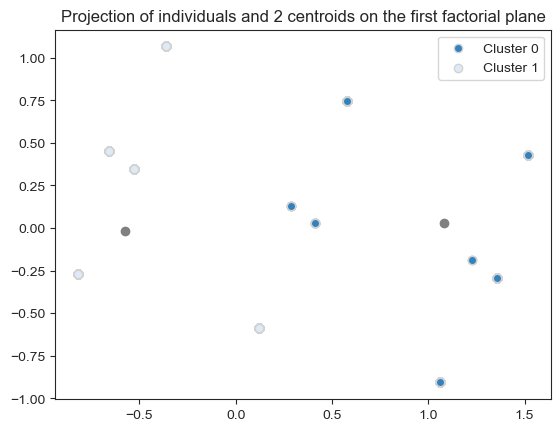

Survived    0    1
row_0             
0          86  223
1         463  119


In [36]:
# Nombre de clusters
n_clust = 2

# Clustering par K-means:
df_km = df[["Survived", "Pclass", "Sex"]]
km = KMeans(n_clusters=n_clust, random_state=1994)
x_km = km.fit_transform(df_km)

# Ajout d'une colonne contenant le cluster attribue:
clusters_km = km.labels_

centroids_km = km.cluster_centers_

# Clustering par projection des individus sur le premier plan factoriel:
pca_km = PCA(n_components=3).fit(df_km)
acp_km = pca_km.transform(df_km)

centroids_km_projected = pca_km.transform(centroids_km)

# Graphique:
for couleur, k in zip(["#3182bd", "#deebf7"], [0, 1]):
    plt.scatter(acp_km[km.labels_ == k, 0], acp_km[km.labels_ == k, 1], c=couleur, edgecolors="#D3D3D3", label="Cluster {}".format(k))
    plt.legend()
plt.scatter(centroids_km_projected[:, 0], centroids_km_projected[:, 1], color="grey", label="Centroids")
plt.title("Projection of individuals and {} centroids on the first factorial plane".format(len(centroids_km)))
plt.show()

# Verification of classification: Confusion matrix
km_matrix = pd.crosstab(clusters_km, df["Survived"])
print(km_matrix)

Text(0.5, 1.0, 'Matrice de confusion K-means\n')

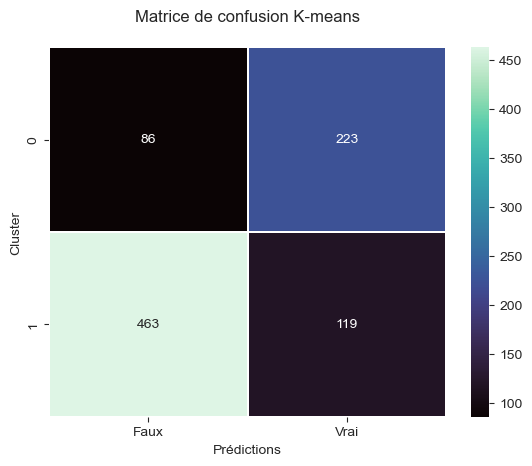

In [37]:
# Graphique:
 
import seaborn as sn

sn.heatmap(km_matrix,
            annot = True,
            fmt = ".3g", 
            cmap = sn.color_palette("mako", as_cmap=True),
            linecolor = "white",
            linewidths = 0.3,
            xticklabels = ["Faux","Vrai"],
            yticklabels=["0","1"]
            )
plt.xlabel("Prédictions")
plt.ylabel("Cluster")
plt.title("Matrice de confusion K-means\n")

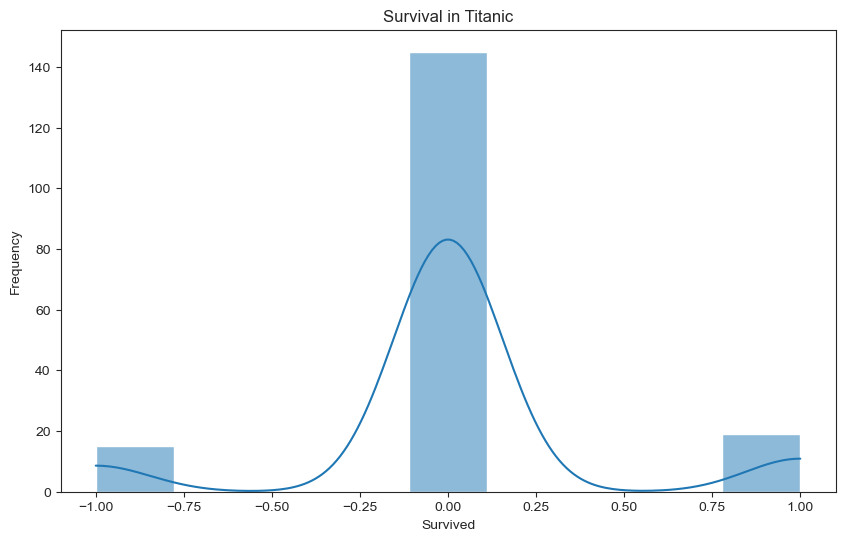

In [38]:
# Calcul des résidus

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sn.histplot(residuals, kde=True)
plt.title('Survival in Titanic')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

In [39]:
# Calculs

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error


r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)


print("Score R² sur les données de test :", r2,"\n")
print("Score Mean absolute error sur les données de test :", mae,"\n")
print("Score Mean squared error sur les données de test :", rmse,"\n")

Score R² sur les données de test : 0.2167310167310167 

Score Mean absolute error sur les données de test : 0.18994413407821228 

Score Mean squared error sur les données de test : 0.43582580703557733 



In [40]:
iloc = x_train.iloc[0]
print(iloc.to_dict())

{'Pclass': 1.0, 'Sex': 1.0, 'Age': 45.5, 'SibSp': 0.0, 'Parch': 0.0, 'Fare': 28.5, 'Embarked_Q': 0.0, 'Embarked_S': 1.0}


In [41]:
# On calcule la donnée d'un nouveau passager, qui n'est pas dans la DataSet. On a simplement à modifier une des données.

new_passenger = {
    'Pclass': 1.0,
    'Sex': 1.0,
    'Age': 35.5,
    'SibSp': 0.0,
    'Parch': 0.0,
    'Fare': 28.5,
    'Embarked_Q': 0.0,
    'Embarked_S': 1.0
}

# Creer un DataFrame pour le nouveau passager 

new_passenger_df = pd.DataFrame([new_passenger])

new_passenger_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1.0,1.0,35.5,0.0,0.0,28.5,0.0,1.0


In [42]:
# Prédire la survie du nouveau passager

resultat = model.predict(new_passenger_df)
resultat

array([0.])